In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

## Податоци

In [2]:
data = pd.read_csv("../data/data.csv")
data = data.drop(["Unnamed: 0","logPrice"],axis=1)
print("Number of records = " + str(data.shape[0]))
print("Number of features = " + str(data.shape[1]))
data.head()

Number of records = 378
Number of features = 72


,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Micromax,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,0,1,0,0,0,0,0
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
boolean_columns = ['Touchscreen', 'Headphones','Face unlock', 'Fingerprint sensor', 'Wireless charging',
       'NFC', '4G/ LTE', '5G','3G', 'EDGE', 'GPRS', 'Wi-Fi', 'VoLTE', 'Bluetooth', 'GPS', 'FM Radio', 'Fast Charging', 'Removable Battery',
       'Card Slot', 'Light Sensor', 'Compass Sensor', 'Proximity Sensor', 'Magnetic Sensor',
       'Gravity Sensor', 'Heathtracking Sensor', 'Gyroscope Sensor', 'Accelerometar Sensor',
       'Vibration Sensor', 'Laser Sensor']
categorical_columns = ['SIM Type', 'Usb Type', 'OS', 'cpuCores', 'Chipset', 'Flash','Launched_Month', 'Launched_Year','Manufacturer']
numerical_columns = ['Battery capacity', 'Screen Size', 'Internal storage','Number of SIMs','Expandable storage', 'Price'
                    ,'CPU', 'RAM', 'Rear Camera', 'Front Camera','PPI','Width', 'Height', 'Weight','Number of Rear Cameras','Resolution_x', 
                     'Resolution_y']
brand_columns = ['Brand__Coolpad', 'Brand__Google', 
       'Brand__Huawei', 'Brand__Infinix', 'Brand__LG', 'Brand__Lenovo',
       'Brand__Micromax', 'Brand__Motorola', 'Brand__Nokia', 'Brand__OnePlus',
       'Brand__Oppo',  'Brand__Realme', 'Brand__Samsung',
       'Brand__Tecno', 'Brand__Vivo', 'Brand__Xiaomi','Brand__Apple']

In [4]:
data = data.drop(brand_columns,axis=1)

In [5]:
data.head()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Compass Sensor,Proximity Sensor,Magnetic Sensor,Gravity Sensor,Heathtracking Sensor,Gyroscope Sensor,Accelerometar Sensor,Vibration Sensor,Laser Sensor,Manufacturer
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,1,1,0,0,0,1,1,0,0,11
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,1,1,0,0,0,1,1,0,0,0


Ги отстрануваме атрибутити кои претходно со визуелизација заклучивме дека не допринесуваат со нови информации

In [6]:
to_remove = ['3G', 'Wi-Fi', 'Bluetooth', 'GPS', 'Proximity Sensor', 'Accelerometar Sensor', 'EDGE']
data = data.drop(to_remove,axis=1)
for column in to_remove:
    boolean_columns.remove(column)
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 7 features
Updated number of features = 48


## Кластерирање 1

За првиот проблем на кластерирање ќе ги кластерираме записите во 7 кластери колку што и одредивме класи во проблемот на класифицирање (ги отстрануваме понебројните класите со нивните записи). 

In [7]:
counts = data['Manufacturer'].value_counts()
n = data.shape[0]
data1 = data.loc[data['Manufacturer'].isin(counts.index[counts > 10])]
print("Removed " + str(n-data1.shape[0]) + " records")
print("Updated number of records = " + str(data1.shape[0]))

Removed 29 records
Updated number of records = 349


In [8]:
X = data1.drop(['Manufacturer'], axis=1)
y = data1['Manufacturer']
categorical_columns.remove("Manufacturer")

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
columns = data.columns.tolist()
columns.remove('Manufacturer')
X = pd.DataFrame(X, columns = columns)

Поради тоа што работиме со различни видови на атрибути потребно е да користиме модел за класификација во кој ќе можеме ние да ја одредиме метриката за пресметување растојание помеѓу два записа. Ќе користиме хиерархиско AgglomerativeClustering така што за растојание ќе користиме пресметана distance матрица. Растојанието помеѓу два записа запишано во матрицата претставува збир на Minkowski растојание помеѓу нумеричките атрибути и 1 0 растојание за категоричките атрибути (1 ако се иста вредност 0 инаку)

In [10]:
n = X.shape[0]
distance_matrix = np.zeros((n,n))

In [11]:
def cat_distance(a, b):
    dist = 0
    for i in range(len(a)):
        if a[i]!=b[i]:
            dist = dist + 1
    return dist

In [13]:
for i in range(0,n):
    for j in range(i+1,n):
        dist = distance.minkowski(X[numerical_columns].iloc[i].tolist(), X[numerical_columns].iloc[j].tolist(), 1)
        dist = dist + cat_distance(X[boolean_columns].iloc[i].tolist(), X[boolean_columns].iloc[j].tolist())
        dist = dist + cat_distance(X[categorical_columns].iloc[i].tolist(), X[categorical_columns].iloc[j].tolist())
        distance_matrix[i][j] = dist
        distance_matrix[j][i] = dist

In [14]:
clustering = AgglomerativeClustering(n_clusters = 7,affinity="precomputed",linkage="average").fit(distance_matrix)
print("ARI = " + str(adjusted_rand_score(clustering.labels_,y)))

ARI = 0.12160551728780002


Од пресметаниот Adjusted Rand Index можеме да заклучиме дека Unsupervised кластерирање на записите не соодветствува со поделба на истите телефони според нивниот произведувач

In [15]:
if "Manufacturer" not in categorical_columns:
    categorical_columns.append("Manufacturer")

## Кластерирање 2

За вториот проблем на кластерирање потребно е да го дискретизираме атрибутот цена. Ќе го дискретизираме во 3 сета поделени според 33 и 66 перцентил.Потоа на исти начин како и погоре ќе ги кластерираме записите во 3 кластери со цел потоа тие кластери да ги споредиме со вредностите од дискретизираниот атрибут цена

In [16]:
X = data.drop(['Price'], axis=1)
y = data['Price']
numerical_columns.remove('Price')

In [17]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
columns = data.columns.tolist()
columns.remove('Price')
X = pd.DataFrame(X, columns = columns)

In [18]:
p_1 = np.percentile(y.tolist(), 33)
p_2 = np.percentile(y.tolist(), 66)

labels = []
color_map = []
for value in y:
    if value < p_1:
        labels.append(0)
        color_map.append("green")
    elif value < p_2:
        labels.append(1)
        color_map.append("yellow")
    else:
        labels.append(2)
        color_map.append("red")

In [19]:
n = X.shape[0]
distance_matrix = np.zeros((n,n))

In [20]:
def cat_distance(a, b):
    dist = 0
    for i in range(len(a)):
        if a[i]!=b[i]:
            dist = dist + 1
    return dist

In [21]:
for i in range(0,n):
    for j in range(i+1,n):
        dist = distance.minkowski(X[numerical_columns].iloc[i].tolist(), X[numerical_columns].iloc[j].tolist(), 1)
        dist = dist + cat_distance(X[boolean_columns].iloc[i].tolist(), X[boolean_columns].iloc[j].tolist())
        dist = dist + cat_distance(X[categorical_columns].iloc[i].tolist(), X[categorical_columns].iloc[j].tolist())
        distance_matrix[i][j] = dist
        distance_matrix[j][i] = dist

In [22]:
clustering = AgglomerativeClustering(n_clusters = 3,affinity="precomputed",linkage="average").fit(distance_matrix)
print("ARI = " + str(adjusted_rand_score(clustering.labels_,labels)))

ARI = 0.06971985963642827


Од пресметаниот Adjusted Rand Index можеме да заклучиме дека Unsupervised кластерирање на записите не соодветствува со поделба на истите телефони според нивната цена

##### Визуелизации

Визуелизација на кластерирање 2

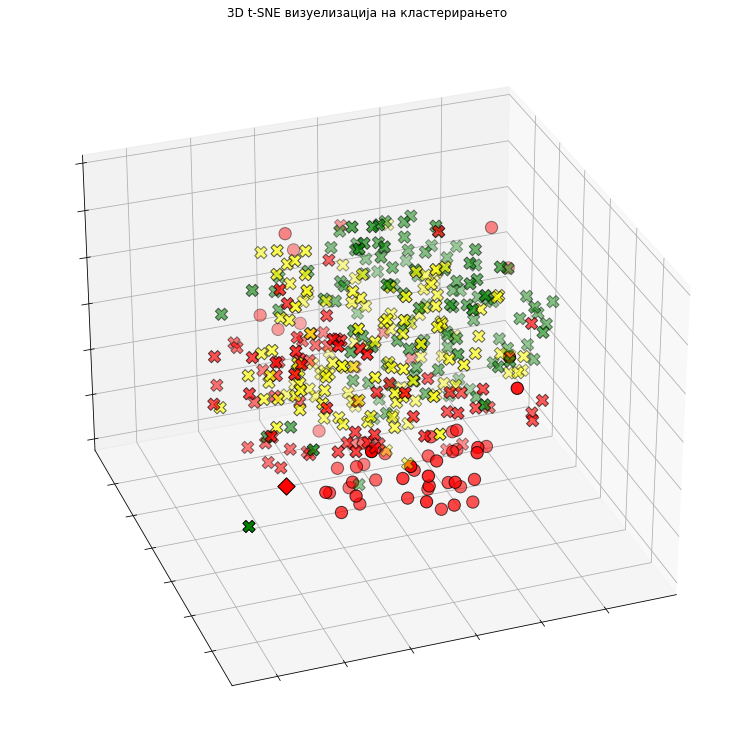

Со различна боја се претставени 3те кластери определени според вредноста на атрибутот Price
Со различна форма се претставени 3те кластери определени со unsupervised кластерирање


In [23]:
tsne = TSNE(random_state=42, n_components = 3 )
X_tsne = tsne.fit_transform(X)
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_tsne[:, 0][clustering.labels_==0], X_tsne[:, 1][clustering.labels_==0], X_tsne[:, 2][clustering.labels_==0], 
           c=np.array(color_map)[clustering.labels_==0], edgecolor='k', s=150, marker = "X")
ax.scatter(X_tsne[:, 0][clustering.labels_==1], X_tsne[:, 1][clustering.labels_==1], X_tsne[:, 2][clustering.labels_==1], 
           c=np.array(color_map)[clustering.labels_==1], edgecolor='k', s=150, marker = "o")
ax.scatter(X_tsne[:, 0][clustering.labels_==2], X_tsne[:, 1][clustering.labels_==2], X_tsne[:, 2][clustering.labels_==2],
           c=np.array(color_map)[clustering.labels_==2], edgecolor='k', s=150, marker = "D")
ax.set_title("3D t-SNE визуелизација на кластерирањето")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()
print("Со различна боја се претставени 3те кластери определени според вредноста на атрибутот Price")
print("Со различна форма се претставени 3те кластери определени со unsupervised кластерирање")

In [24]:
if "Price" not in numerical_columns:
    numerical_columns.append("Price")